In [15]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as shibal
import mplfinance as mplf
import zipfile

In [16]:
def prep_df(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
    return df.sort_values("Date")

In [ ]:
cols = ["Date", "Close", "High", "Low", "Open", "Volume"]

AIG_df = prep_df(pd.read_csv("../data/gfc/AIG.csv", skiprows = 3, names = cols))
C_df = prep_df(pd.read_csv("../data/gfc/C.csv", skiprows = 3, names = cols))
JPM_df = prep_df(pd.read_csv("../data/gfc/JPM.csv", skiprows = 3, names = cols))
DJI_df = prep_df(pd.read_csv("../data/gfc/^DJI.csv", skiprows = 3, names = cols))
GSPC_df = prep_df(pd.read_csv("../data/gfc/^GSPC.csv", skiprows = 3, names = cols))
VIX_df = prep_df(pd.read_csv("../data/gfc/^VIX.csv", skiprows = 3, names = cols))

TEDRATE_df = prep_df(pd.read_csv("../data/gfc/TEDRATE.csv", skiprows = 3, names = cols))
WGS3MO_df = prep_df(pd.read_csv("../data/gfc/WGS3MO.csv", skiprows = 3, names = cols))

allStocks = {
    "AIG": AIG_df,
    "C": C_df,
    "JPM": JPM_df,
    "DJI": DJI_df,
    "GSPC": GSPC_df,
    "VIX": VIX_df,
    "TEDRATE": TEDRATE_df,
    "WGS3MO": WGS3MO_df
}

## Generate trend graphs

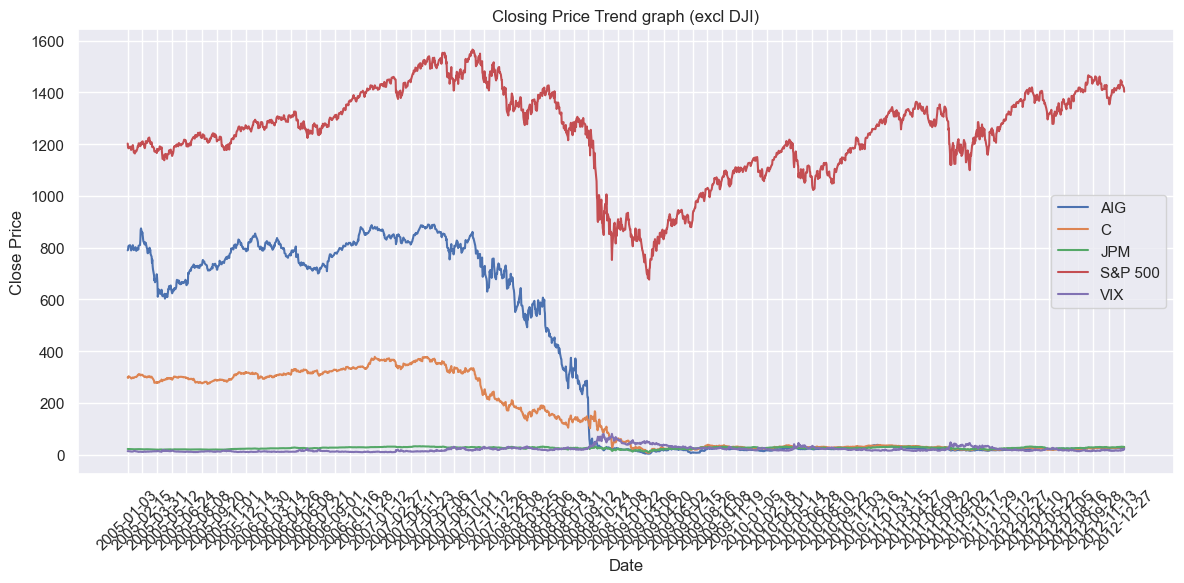

In [5]:
shibal.set_theme(style="darkgrid")

mlp.figure(figsize=(12, 6))
shibal.lineplot(data=AIG_df,  x = "Date", y = "Close", label = "AIG")
shibal.lineplot(data=C_df,    x = "Date", y = "Close", label = "C")
shibal.lineplot(data=JPM_df,  x = "Date", y = "Close", label = "JPM")
# shibal.lineplot(data=DJI_df,  x = "Date", y = "Close", label = "DJI")
shibal.lineplot(data=GSPC_df, x = "Date", y = "Close", label = "S&P 500")
shibal.lineplot(data=VIX_df,  x = "Date", y = "Close", label = "VIX")

dates = AIG_df["Date"]
mlp.xticks(dates[::30], rotation=45)

mlp.title("Closing Price Trend graph (excl DJI)")
mlp.xlabel("Date")
mlp.ylabel("Close Price")
mlp.tight_layout()
mlp.show()

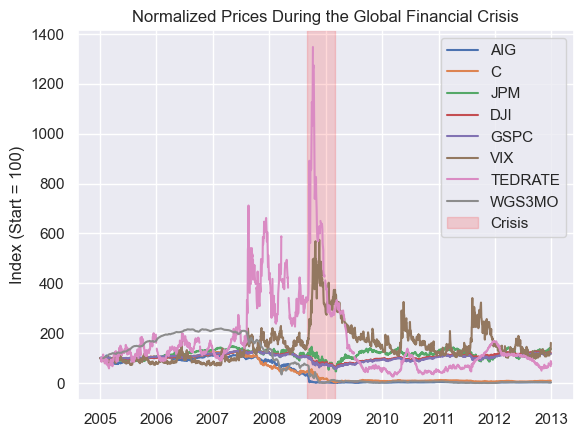

In [6]:
# time series
mlp.figure()

for name, df in allStocks.items():
    df = df.sort_values("Date").copy()
    df["Normalized"] = df["Close"] / df["Close"].iloc[0] * 100
    mlp.plot(df["Date"], df["Normalized"], label=name)

mlp.axvspan(
    pd.Timestamp("2008-09-01"),
    pd.Timestamp("2009-03-01"),
    color="red",
    alpha=0.15,
    label="Crisis"
)

mlp.title("Normalized Prices During the Global Financial Crisis")
mlp.ylabel("Index (Start = 100)")
mlp.legend()
mlp.show()

C:\Users\alden\AppData\Roaming\Python\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


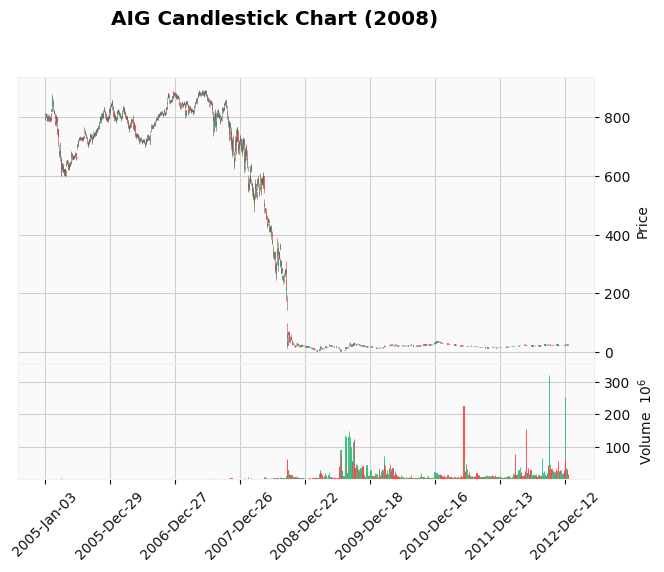

In [7]:
mplf.plot(
    AIG_df.set_index("Date"),
    type="candle",
    volume=True,
    style="yahoo",
    title="AIG Candlestick Chart (2008)"
)

C:\Users\alden\AppData\Local\Temp\ipykernel_28776\1074279719.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Return"] = df["Close"].pct_change()


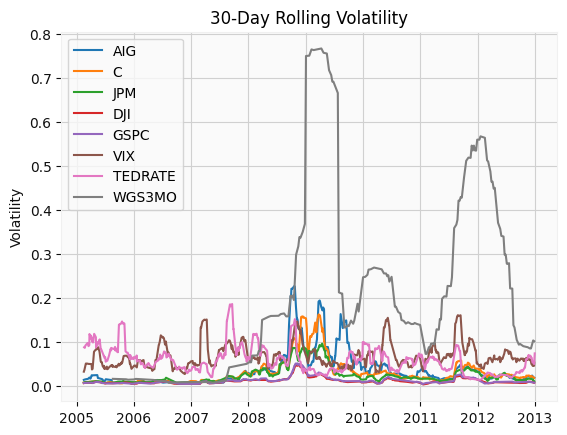

In [8]:
for name, df in allStocks.items():
    df = df.sort_values("Date").copy()
    df["Return"] = df["Close"].pct_change()
    df["RollingVol"] = df["Return"].rolling(30).std()

    mlp.plot(df["Date"], df["RollingVol"], label=name)

mlp.title("30-Day Rolling Volatility")
mlp.ylabel("Volatility")
mlp.legend()
mlp.show()  

## panic selling
compare price and volume of sales

when the stock tanked people panic sell

the y axis not the same but the trend of panic selling is clearly there

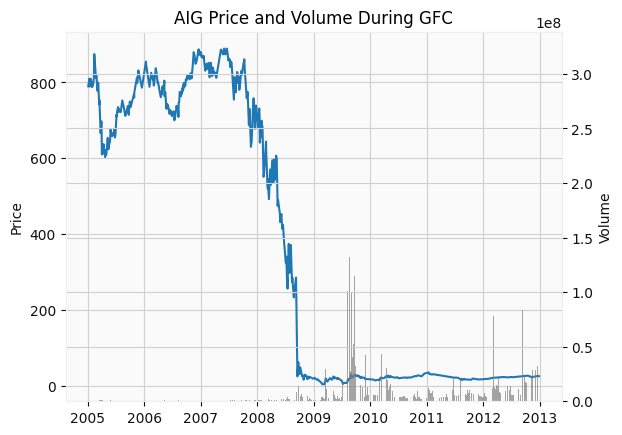

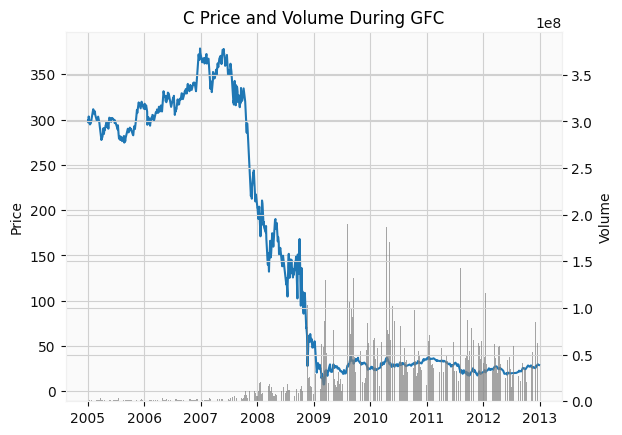

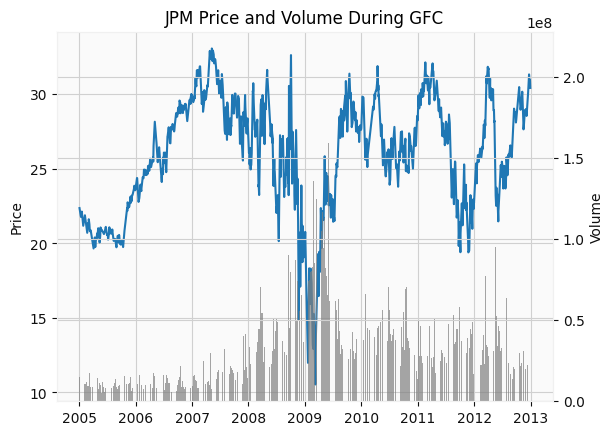

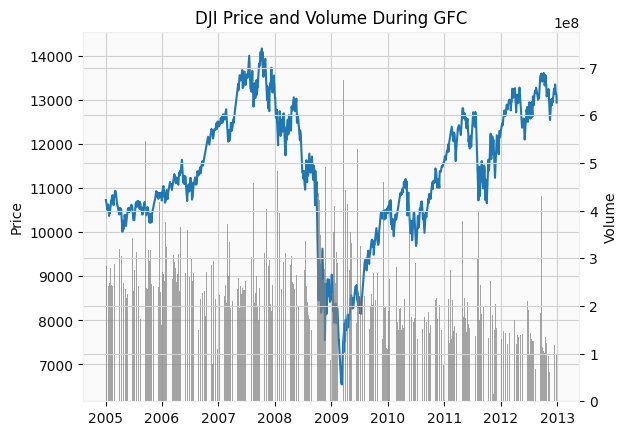

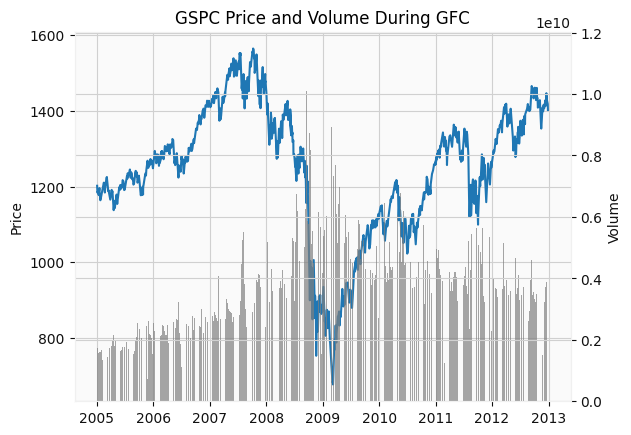

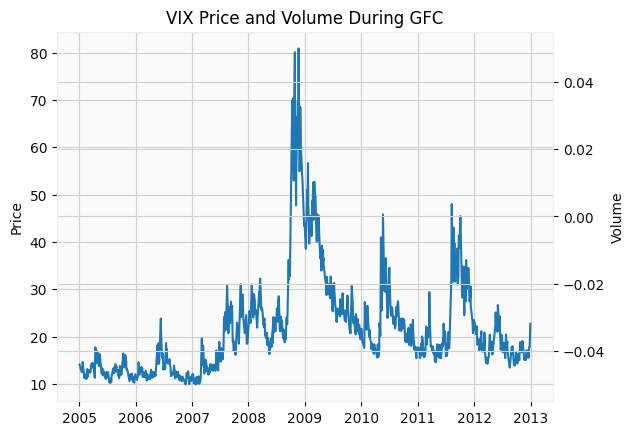

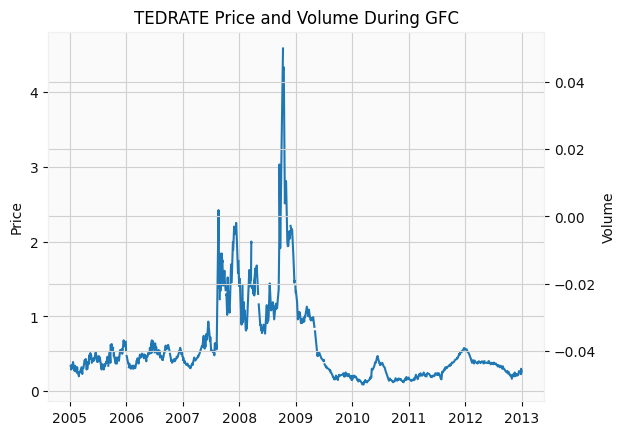

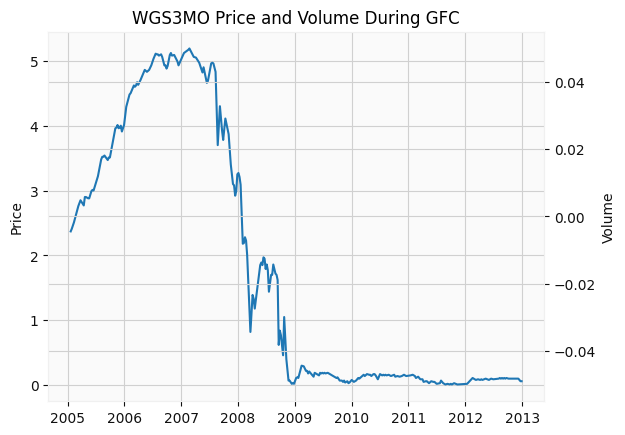

In [9]:
for name, df in allStocks.items():

    fig, ax1 = mlp.subplots()

    ax1.plot(df["Date"], df["Close"], color="tab:blue")
    ax1.set_ylabel("Price")

    ax2 = ax1.twinx()
    ax2.bar(df["Date"], df["Volume"], alpha=0.7, color="gray")
    ax2.set_ylabel("Volume")

    mlp.title(name + " Price and Volume During GFC")
    mlp.show()

# Token Data Analysis
taken from event_data.csv and token_transfers_V3

In [10]:
with open("../data/ERC20-stablecoins/token_transfers.csv") as f:
    # Read the first few rows
    sample = pd.read_csv(f, nrows=5)
    print(f"\n📋 All columns in token_transfers.csv:")
    print(sample.columns.tolist())
    print(f"\n📊 First 5 rows:")
    print(sample)


📋 All columns in token_transfers.csv:
['block_number', 'transaction_index', 'from_address', 'to_address', 'time_stamp', 'contract_address', 'value']

📊 First 5 rows:
   block_number  transaction_index  \
0      14669683                  7   
1      14669683                 45   
2      14669683                 46   
3      14669683                 47   
4      14669683                 48   

                                 from_address  \
0  0xd30b438df65f4f788563b2b3611bd6059bff4ad9   
1  0x4941834ed1428089ee76252f6f9d767e800499b0   
2  0x2c1f9a20711e14f8484a41123e20d1b06858ebea   
3  0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0   
4  0x66589b8278470d58d4112f3d065de0f75734312e   

                                   to_address  time_stamp  \
0  0xda816e2122a8a39b0926bfa84edd3d42477e9efd  1651105815   
1  0x28c6c06298d514db089934071355e5743bf21d60  1651105815   
2  0x28c6c06298d514db089934071355e5743bf21d60  1651105815   
3  0x3cd751e6b0078be393132286c442345e5dc49699  1651105815   
4  0

In [11]:
tokenCols = [
    "block",
    "log_index",
    "from_addr",
    "to_addr",
    "timestamp",
    "token",
    "amount"
]

token_df = pd.read_csv(
    "../data/ERC20-stablecoins/token_transfers_V3.0.0.csv",
    sep="\t",
    header=None,
    names=cols
)

# Convert timestamp to datetime
token_df["datetime"] = pd.to_datetime(token_df["timestamp"], unit="s", utc = True)

# Ensure amount is numeric
token_df["amount"] = pd.to_numeric(df["amount"])

token_df.info()
token_df.head()

KeyError: 'timestamp'

4. Shares put out in the market against time (13 Sep - 21 Sep)

The TED spread is used as a proxy for liquidity stress and investor withdrawal pressure. The sharp increase in the TED spread between 13 and 21 September 2008 reflects heightened counterparty risk following the collapse of Lehman Brothers, which coincided with significant redemptions from money market funds such as the Reserve Primary Fund.

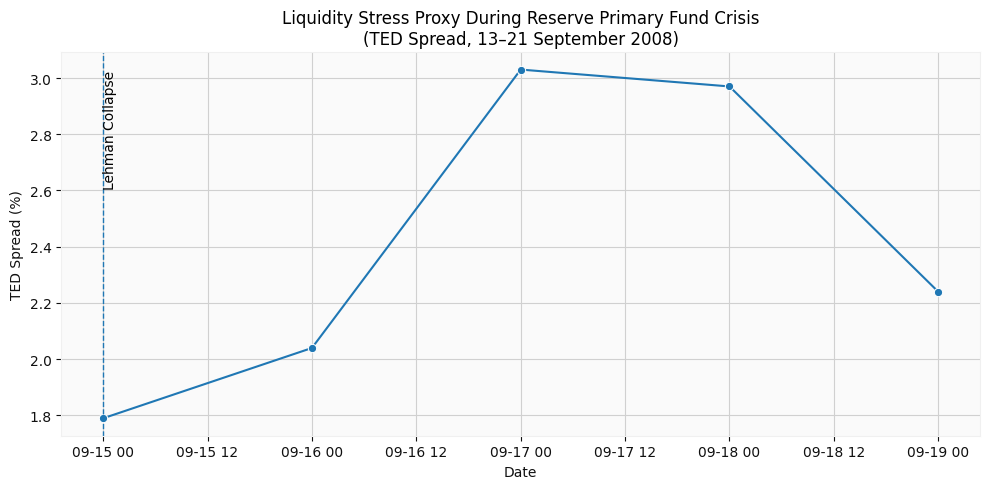

In [21]:
# Select TEDRATE from your dictionary
ted_df = allStocks["TEDRATE"].copy()

# Crisis window
start_date = "2008-09-13"
end_date = "2008-09-21"

ted_window = ted_df[
    (ted_df["Date"] >= start_date) & 
    (ted_df["Date"] <= end_date)
]

# Plot
mlp.figure(figsize=(10, 5))
shibal.lineplot(
    data=ted_window,
    x="Date",
    y="Close",
    marker="o"
)

# Lehman Brothers collapse
mlp.axvline(
    pd.to_datetime("2008-09-15"),
    linestyle="--",
    linewidth=1
)
mlp.text(
    pd.to_datetime("2008-09-15"),
    ted_window["Close"].max(),
    "Lehman Collapse",
    rotation=90,
    verticalalignment="top"
)

# Titles and labels
mlp.title(
    "Liquidity Stress Proxy During Reserve Primary Fund Crisis\n"
    "(TED Spread, 13–21 September 2008)"
)
mlp.xlabel("Date")
mlp.ylabel("TED Spread (%)")

mlp.tight_layout()
mlp.show()

5. NAV of reserve primary fund against time (13 Sep - 21 Sep)

The deterioration of the Reserve Primary Fund’s NAV during mid-September 2008 coincided with sharp increases in both the TED spread and the VIX, reflecting heightened counterparty risk and investor fear. These indicators jointly serve as proxies for the systemic stress that led to the fund breaking the buck.

In [ ]:
# Select datasets
ted_df = allStocks["TEDRATE"].copy()
vix_df = allStocks["VIX"].copy()

# Crisis window
start_date = "2008-09-13"
end_date = "2008-09-21"

ted_window = ted_df[(ted_df["Date"] >= start_date) & (ted_df["Date"] <= end_date)]
vix_window = vix_df[(vix_df["Date"] >= start_date) & (vix_df["Date"] <= end_date)]

# Plot
mlp.figure(figsize=(10, 5))

shibal.lineplot(data=ted_window, x="Date", y="Close", label="TED Spread")
shibal.lineplot(data=vix_window, x="Date", y="Close", label="VIX")

# Lehman event
mlp.axvline(pd.to_datetime("2008-09-15"), linestyle="--", linewidth=1)
mlp.text(pd.to_datetime("2008-09-15"),
         max(ted_window["Close"].max(), vix_window["Close"].max()),
         "Lehman Collapse",
         rotation=90,
         verticalalignment="top")

# Labels
mlp.title(
    "Market Stress Proxies for Reserve Primary Fund NAV Deterioration\n"
    "(13-21 September 2008)"
)
mlp.xlabel("Date")
mlp.ylabel("Index Level / Spread (%)")
mlp.legend()

mlp.tight_layout()
mlp.show()


6. Shareholder Payout value (Left Y-axis) and Fed support (SEC, AMLF, Treasury $50billion) against time (2008 - 2014 )

Following the introduction of Federal Reserve and Treasury support measures in September 2008, financial market conditions gradually stabilised. This is reflected in the recovery of the S&P 500 over the subsequent years, which serves as a proxy for improving shareholder payout certainty and restored confidence in money market funds.

In [ ]:
# Select S&P 500 data
gspc_df = allStocks["GSPC"].copy()

# Time window
start_date = "2008-01-01"
end_date = "2014-12-31"

gspc_window = gspc_df[
    (gspc_df["Date"] >= start_date) &
    (gspc_df["Date"] <= end_date)
]

# Plot
fig, ax1 = mlp.subplots(figsize=(12, 6))

# Left Y-axis: Shareholder recovery proxy
ax1.plot(gspc_window["Date"], gspc_window["Close"], label="S&P 500", linewidth=1.5)
ax1.set_xlabel("Year")
ax1.set_ylabel("S&P 500 Index Level")
ax1.set_title(
    "Shareholder Recovery Proxy and Federal Support Measures\n"
    "(2008-2014)"
)

# Fed intervention markers
interventions = {
    "Lehman Collapse": "2008-09-15",
    "AMLF Introduced": "2008-09-19",
    "Treasury MMF Guarantee": "2008-09-19",
    "TARP Signed": "2008-10-03"
}

for label, date in interventions.items():
    ax1.axvline(pd.to_datetime(date), linestyle="--", linewidth=1)
    ax1.text(pd.to_datetime(date),
             gspc_window["Close"].min(),
             label,
             rotation=90,
             verticalalignment="bottom")

ax1.legend()
mlp.tight_layout()
mlp.show()
